# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [94]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
# Set the base directory in
# C:\Users\Faramarz\.jupyter\jupyter_notebook_config.py
# c.NotebookApp.notebook_dir = 'D:\\Users\\Faramarz\\UofT\\ClassProjects\\Module5-Matplot\\Assignment\\PyBer_Analysis'

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [95]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [96]:
#  1. Get the total rides for each city type
rides_byCityType = pyber_data_df.groupby(['type']).count()['ride_id']
rides_byCityType.head()


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [97]:
# 2. Get the total drivers for each city type
drivers_byCityType = city_data_df.groupby(['type']).sum()['driver_count']
drivers_byCityType.head()

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [98]:
#  3. Get the total amount of fares for each city type
fares_byCityType = pyber_data_df.groupby(['type']).sum()['fare']
fares_byCityType.head()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [99]:
#  4. Get the average fare per ride for each city type.
average_fare_perRide_byCityType = fares_byCityType/rides_byCityType
average_fare_perRide_byCityType.head()

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [100]:
# 5. Get the average fare per driver for each city type. 
average_fare_perDriver_byCityType = fares_byCityType/drivers_byCityType
average_fare_perDriver_byCityType.head()

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [101]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({
    'Total Rides': rides_byCityType,
    'Total Drivers':drivers_byCityType,
    'Total Fares':fares_byCityType,
    'Average Fare per Ride':average_fare_perRide_byCityType,
    'Average Fare per Driver':average_fare_perDriver_byCityType
})
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [102]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None


In [103]:
#  8. Format the columns.
pyber_summary_df['Total Fares']= pyber_summary_df['Total Fares'].map('${:,.2f}'.format)
pyber_summary_df['Average Fare per Ride'] = pyber_summary_df['Average Fare per Ride'].map('{:,.2f}'.format)
pyber_summary_df['Average Fare per Driver'] = pyber_summary_df['Average Fare per Driver'].map('{:,.2f}'.format)
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",34.62,55.49
Suburban,625,490,"$19,356.33",30.97,39.50
Urban,1625,2405,"$39,854.38",24.53,16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [104]:
# 9. Read the merged DataFrame

In [105]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
pyber_type_df = pyber_data_df.groupby(['date','type']).sum()['fare']
pyber_type_df.head()

date                 type    
2019-01-01 00:08:16  Urban       37.91
2019-01-01 00:46:46  Suburban    47.74
2019-01-01 02:07:24  Suburban    24.07
2019-01-01 03:46:50  Urban        7.57
2019-01-01 05:23:21  Urban       10.75
Name: fare, dtype: float64

In [130]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
pyber_type_df = pyber_type_df.reset_index()
pyber_type_df.tail()

,index,date,type,fare
2370,2370,2019-05-08 04:20:00,Urban,21.99
2371,2371,2019-05-08 04:39:49,Urban,18.45
2372,2372,2019-05-08 07:29:01,Urban,18.55
2373,2373,2019-05-08 11:38:35,Urban,19.77
2374,2374,2019-05-08 13:10:18,Urban,18.04


In [107]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pyber_pivot = pyber_type_df.pivot('date','type','fare')
pyber_pivot.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [131]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
filter = [date for date in pyber_pivot.index if date >= '2019-01-01' and date <= '2019-04-29']
pyber_pivot_filtered = pyber_pivot.loc[filter]



In [132]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
pyber_pivot_filtered.index = pd.to_datetime(pyber_pivot_filtered.index)
pyber_pivot_filtered.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [133]:
# 7. Check that the datatype for the index is datetime using df.info()
pyber_pivot_filtered.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [147]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
pyber_weekly = pyber_pivot_filtered.resample('W').sum() 
# We notice the first date is January 06 not January 01
pyber_weekly

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


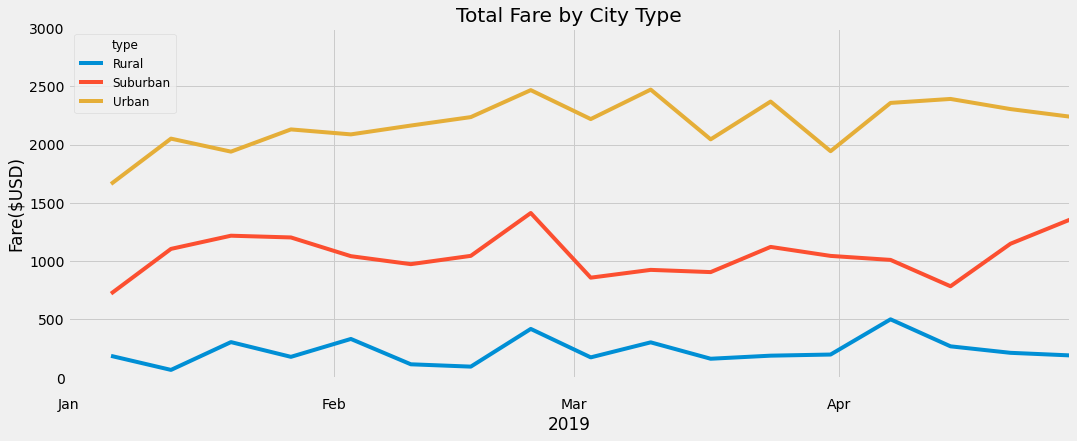

In [150]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
# Import dateformatter to format dates
from matplotlib.dates import DateFormatter
fig, ax = plt.subplots(figsize=(16, 6))
plt.ylim(0, 3000,500)
plt.title('Total Fare by City Type')
plt.ylabel('Fare($USD)')
plt.xlabel('2019')
import datetime 
startdate = datetime.datetime(2019, 1, 1)
enddate = datetime.datetime(2019,4,28)
plt.xlim(startdate,enddate)
plt.grid(True)
x_axis=pyber_weekly.index
y_axis=pyber_weekly.Rural
ax.plot(x_axis, y_axis,label='Rural')
y_axis=pyber_weekly.Suburban
ax.plot(x_axis, y_axis,label='Suburban')
y_axis=pyber_weekly.Urban
ax.plot(x_axis, y_axis,label='Urban')
plt.Formatter()
# format the ticks
import matplotlib as mpl
ax.tick_params(axis='x', which='major', direction='in', pad=20)
months = mpl.dates.MonthLocator()  # every month
months_fmrt = mpl.dates.DateFormatter('%b')
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(months_fmrt)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",scatterpoints=1, loc="best", title="type")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

#save plot
plt.savefig("analysis/PyBer_fare_summary.png")

